<a href="https://colab.research.google.com/github/dikshaaswal/income_food_choices/blob/main/income_influence_on_food_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How does income influence food choices? 🥗💰


## 📖 Background
Does eating healthy depend on what’s in your wallet? While some believe nutritious food is a luxury reserved for those who can afford it, others argue that education, accessibility, and policy interventions play an even bigger role.

As part of a public health research team, your mission is to uncover the real factors driving food choices. Are healthier foods truly more expensive, or do regional access, income distribution, and availability have a greater impact?

Your insights could help shape smarter food policies, making healthy eating more affordable and accessible for all. Are you ready to dig into the data and make a real-world impact?

## 💾 The data

Your team gathered three datasets to analyze the relationship between income levels and food choices:

### Income-Expenditure
- **`Mthly_HH_Income`** – Monthly household income
- **`Mthly_HH_Expense`** – Total monthly household expenses
- **`No_of_Fly_Members`** – Number of family members
- **`Emi_or_Rent_Amt`** – Rent or loan payments
- **`Annual_HH_Income`** – Annual household income
- **`Highest_Qualified_Member`** – Education level of the most qualified household member
- **`No_of_Earning_Members`** – Number of income earners in the household

### Dietary Habits Survey Data
- **`Age`** – Age group of the respondent
- **`Gender`** – Male/Female
- **`Dietary Preference`** – Vegetarian, Non-Vegetarian, Vegan, etc.
- **`Meal Frequency`** – How often certain food types are consumed
- **`Food Restrictions`** – Allergies and dietary restrictions
- **`Beverage Intake`** – Hydration and drink preferences

### Food Prices
- **`Year`** – Year of data collection
- **`Month`** – Month of data collection
- **`Metroregion_code`** – Geographic area code
- **`EFPG_code`** – Food category (e.g., whole grains, processed foods)
- **`Attribute`** – Type of data recorded (e.g., price, purchase amount)
- **`Value`** – Numeric value of the recorded attribute

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Interpretation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pwd

'/work/files/workspace'

## Income & Food Affordability

In [ ]:
income_expenditure = pd.read_csv('data/Income-Expenditure.csv')

In [ ]:
income_expenditure.shape

(50, 7)

In [ ]:
income_expenditure.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [ ]:
income_expenditure.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
#check for zero valued entries
income_expenditure['Mthly_HH_Income'].min()

5000

In [ ]:
income_expenditure['total_expense'] = income_expenditure['Mthly_HH_Expense'] + income_expenditure['Emi_or_Rent_Amt']

In [ ]:
income_expenditure['savings'] = income_expenditure['Mthly_HH_Income'] - income_expenditure['total_expense']

In [ ]:
#per capita savings
income_expenditure['pcs' ]= (income_expenditure['savings']*1.0)/income_expenditure['No_of_Fly_Members']

In [ ]:
income_expenditure.groupby('Highest_Qualified_Member')['Mthly_HH_Income'].mean()

Highest_Qualified_Member
Graduate          40921.052632
Illiterate        25280.000000
Post-Graduate     59166.666667
Professional      52550.000000
Under-Graduate    29350.000000
Name: Mthly_HH_Income, dtype: float64

In [ ]:
income_expenditure.groupby('Highest_Qualified_Member')['savings'].mean()

Highest_Qualified_Member
Graduate          20005.263158
Illiterate         9480.000000
Post-Graduate     26750.000000
Professional      24400.000000
Under-Graduate    15200.000000
Name: savings, dtype: float64

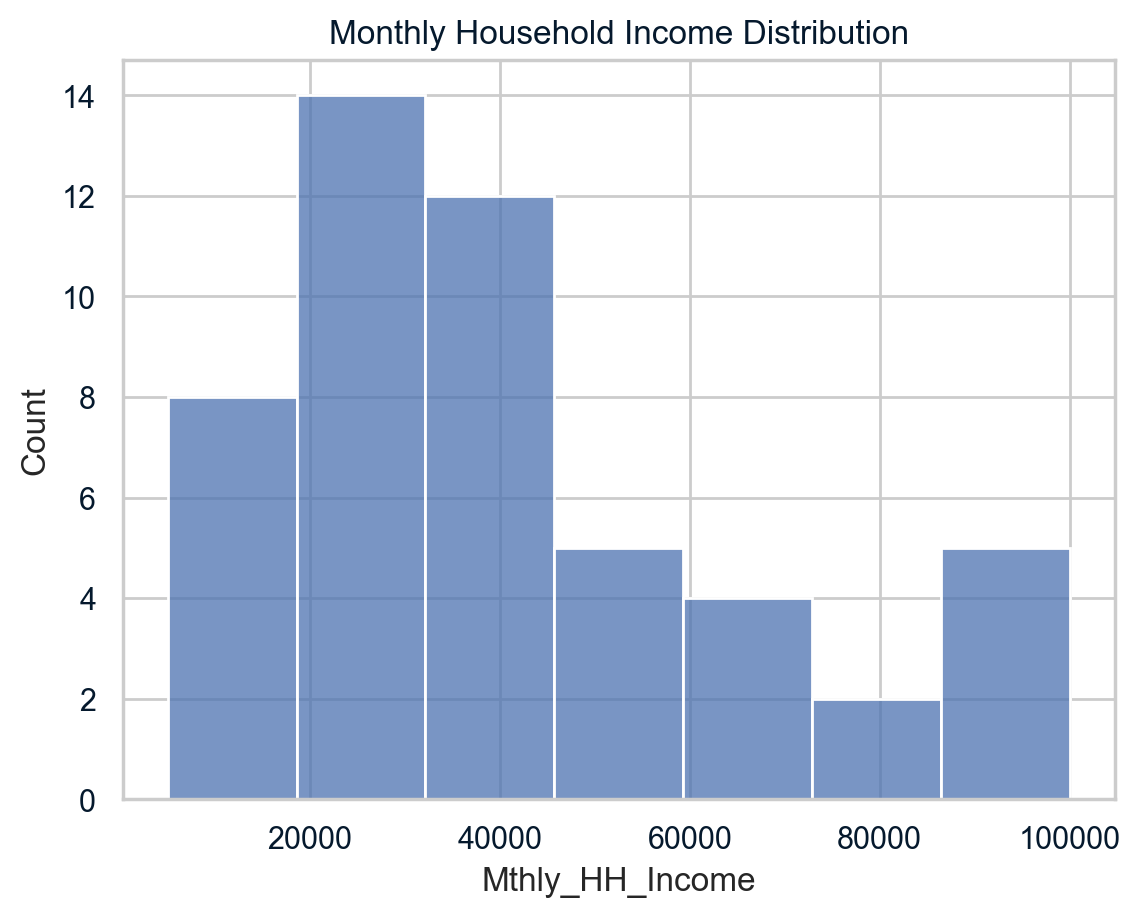

In [ ]:

sns.histplot(income_expenditure['Mthly_HH_Income'])
plt.title("Monthly Household Income Distribution")
plt.show()

In [ ]:
income_expenditure['Mthly_HH_Income'].min()

5000

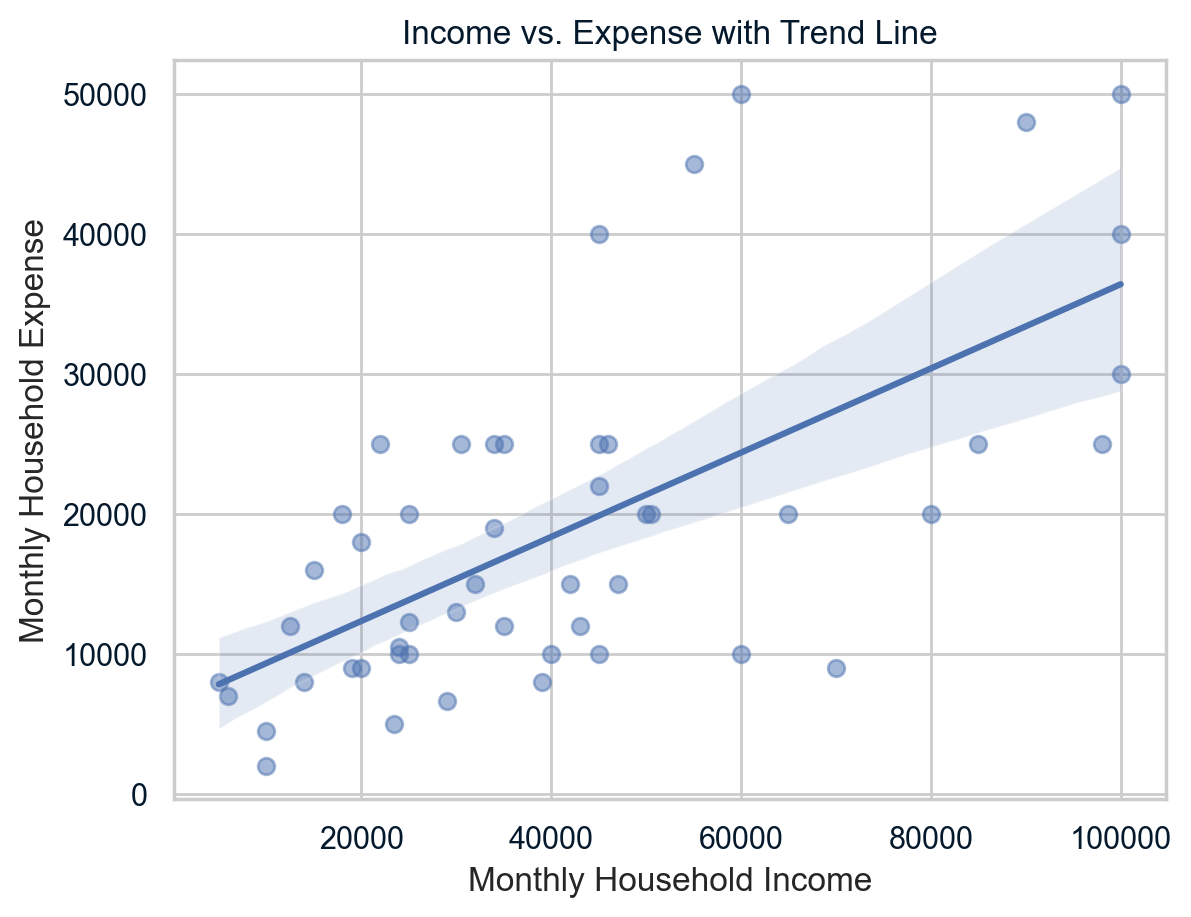

In [ ]:
sns.regplot(x='Mthly_HH_Income', y='Mthly_HH_Expense', data=income_expenditure, scatter_kws={'alpha':0.5})
plt.title("Income vs. Expense with Trend Line")
plt.xlabel("Monthly Household Income")
plt.ylabel("Monthly Household Expense")
plt.show()

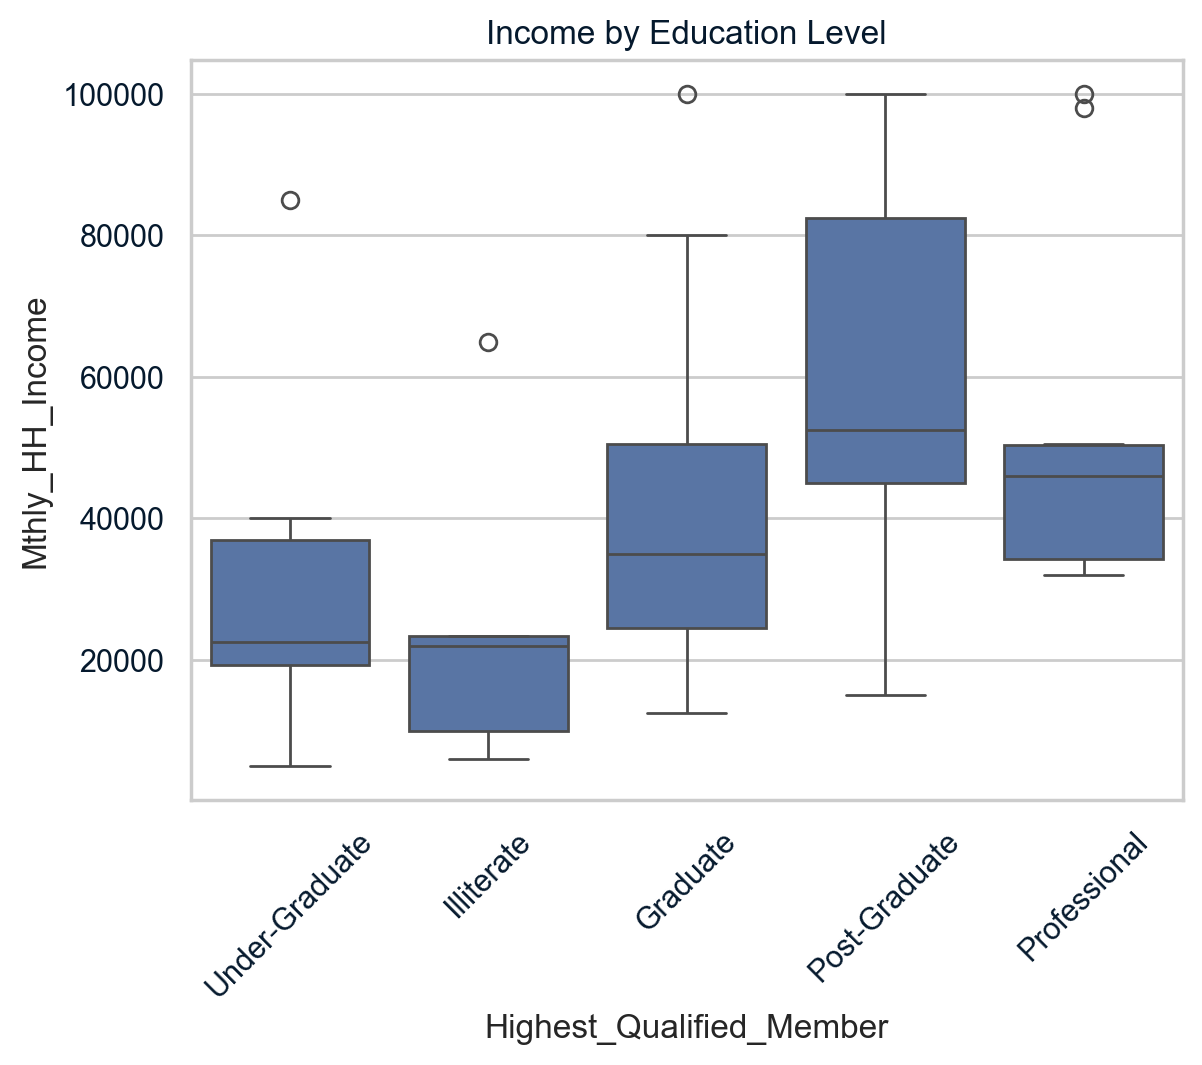

In [ ]:
sns.boxplot(x='Highest_Qualified_Member', y='Mthly_HH_Income', data=income_expenditure)
plt.title("Income by Education Level")
plt.xticks(rotation=45)
plt.show()

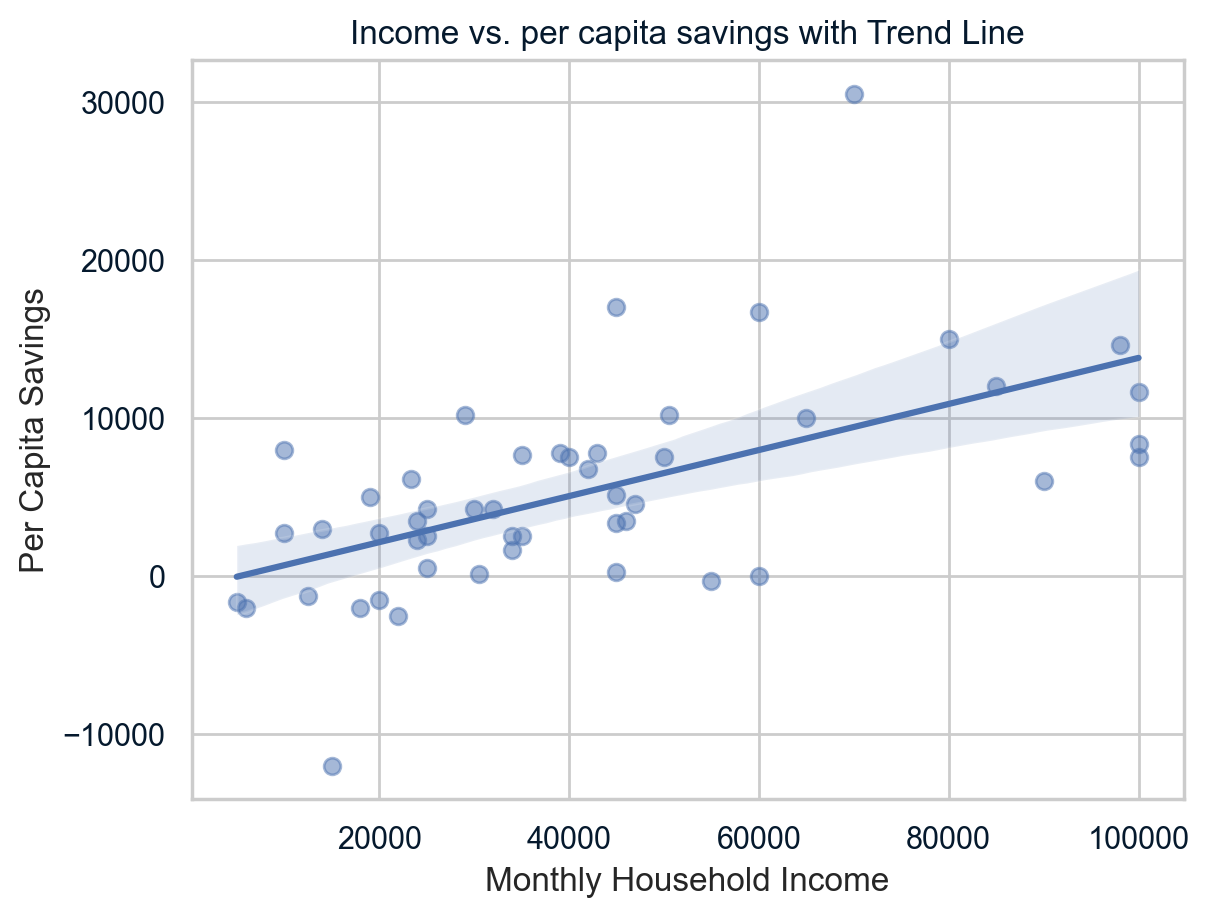

In [ ]:
sns.regplot(x='Mthly_HH_Income', y='pcs', data=income_expenditure, scatter_kws={'alpha':0.5})
plt.title("Income vs. per capita savings with Trend Line")
plt.xlabel("Monthly Household Income")
plt.ylabel("Per Capita Savings")
plt.show()

In [ ]:
food_prices = pd.read_csv('data/Food Prices.csv')

In [ ]:
food_prices.shape

(1020600, 6)

In [ ]:
food_prices.head(5)

,Year,Month,EFPG_code,Metroregion_code,Attribute,Value
0,2012,1,10000,National,Total weighted monthly sales in U.S. dollars,2.493734e+08
1,2012,1,10000,National,Total weighted monthly quantities in grams,4.875195e+10
2,2012,1,10000,National,Total unweighted monthly sales in U.S. dollars,1.629852e+08
3,2012,1,10000,National,Total unweighted monthly quantities in grams,3.217558e+10
4,2012,1,10000,National,Number of stores in geographic area,4.178100e+04


In [ ]:
food_prices.EFPG_code.unique()

array([10000, 10025, 10050, 10075, 15000, 15025, 15050, 15075, 20000,
       20075, 21500, 21525, 21550, 21575, 23000, 23075, 24500, 24525,
       24550, 24575, 26000, 26525, 26550, 26575, 27500, 27550, 27575,
       29000, 29025, 29050, 29075, 30000, 30025, 30050, 30075, 30090,
       35000, 35050, 35075, 40000, 40030, 40060, 43000, 43030, 43060,
       46000, 46050, 50000, 50050, 50075, 51500, 51550, 51575, 53000,
       53050, 53075, 54500, 54550, 56000, 57500, 59000, 60000, 62500,
       65000, 67500, 70000, 70050, 71000, 71050, 72000, 72010, 72020,
       72030, 72040, 72050, 72060, 73000, 73010, 73020, 73030, 73040,
       73050, 73060, 74000, 74050, 75000, 75050, 76000, 77000, 78000])

In [ ]:
food_prices.Metroregion_code.unique()

array(['National', 'Census Region 1: Northeast',
       'Census Region 2: Midwest', 'Census Region 3: South',
       'Census Region 4: West', 'Atlanta-Sandy Springs-Roswell, GA',
       'Boston-Cambridge-Newton, MA-NH',
       'Chicago-Naperville-Elgin, IL-IN-WI',
       'Dallas-Fort Worth-Arlington, TX', 'Detroit-Warren-Dearborn, MI',
       'Houston-The Woodlands-Sugar Land, TX',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Miami-Fort Lauderdale-West Palm Beach, FL',
       'New York-Newark-Jersey City, NY-NJ-PA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD', '0', '1', '2', '3',
       '4'], dtype=object)

In [ ]:
len(food_prices.EFPG_code.unique())

90

In [ ]:
food_prices.Attribute.unique()

array(['Total weighted monthly sales in U.S. dollars',
       'Total weighted monthly quantities in grams',
       'Total unweighted monthly sales in U.S. dollars',
       'Total unweighted monthly quantities in grams ',
       'Number of stores in geographic area',
       'Weighted mean unit value per 100 grams',
       'Standard error of weighted mean unit value',
       'Unweighted mean unit value per 100 grams',
       'Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula'],
      dtype=object)

In [ ]:
price_df = food_prices.pivot_table(
    index=['Year', 'Month', 'EFPG_code', 'Metroregion_code'],
    columns='Attribute',
    values='Value',
    aggfunc='mean'
).reset_index()

In [ ]:
# price_df = food_prices[food_prices['Attribute'] == 'Weighted mean unit value per 100 grams']

In [ ]:
price_df['Unit_Price_USD_per_gram'] = price_df['Total weighted monthly sales in U.S. dollars'] / price_df['Total weighted monthly quantities in grams']

In [ ]:
price_df.head(5)

Attribute,Year,Month,EFPG_code,Metroregion_code,Number of stores in geographic area,"Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula",Standard error of weighted mean unit value,Total unweighted monthly quantities in grams,Total unweighted monthly sales in U.S. dollars,Total weighted monthly quantities in grams,Total weighted monthly sales in U.S. dollars,Unweighted mean unit value per 100 grams,Weighted mean unit value per 100 grams,Unit_Price_USD_per_gram
0,2012,1,10000,"Atlanta-Sandy Springs-Roswell, GA",971.0,0.921250,0.001315,7.193918e+08,3.492452e+06,9.287381e+08,4.529438e+06,0.485473,0.487698,0.004877
1,2012,1,10000,"Boston-Cambridge-Newton, MA-NH",673.0,0.995061,0.006835,6.960863e+08,3.800866e+06,8.790101e+08,4.976761e+06,0.546034,0.566178,0.005662
2,2012,1,10000,Census Region 1: Northeast,6830.0,0.977012,0.002370,6.142840e+09,3.386973e+07,9.487943e+09,5.231058e+07,0.551369,0.551337,0.005513
3,2012,1,10000,Census Region 2: Midwest,7422.0,0.909709,0.001554,6.169714e+09,2.822913e+07,1.027154e+10,4.726901e+07,0.457544,0.460194,0.004602
4,2012,1,10000,Census Region 3: South,20171.0,0.935265,0.000604,1.260220e+10,6.323597e+07,1.682248e+10,8.555468e+07,0.501785,0.508574,0.005086


In [ ]:
yearly_price_by_region = price_df.groupby(['Year', 'Metroregion_code']).agg({'Unit_Price_USD_per_gram':'mean'
}).reset_index()


In [ ]:
yearly_price_by_region

Attribute,Year,Metroregion_code,Unit_Price_USD_per_gram
0,2012,0,0.005529
1,2012,1,0.005867
2,2012,2,0.005384
3,2012,3,0.005471
4,2012,4,0.005713
...,...,...,...
135,2018,"Los Angeles-Long Beach-Anaheim, CA",0.006567
136,2018,"Miami-Fort Lauderdale-West Palm Beach, FL",0.006300
137,2018,National,0.005520
138,2018,"New York-Newark-Jersey City, NY-NJ-PA",0.006790


In [ ]:
# # Plot
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=yearly_price_by_region, x='Year', y='Unit_Price_USD_per_gram', hue='Metroregion_code',
#     marker='o'
# )

# plt.title('Yearly Food Cost Variation by Region', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Average Unit Price (USD per gram)', fontsize=14)
# plt.grid(True)
# plt.legend(title='Region')
# plt.tight_layout()
# plt.show()
import plotly.express as px

# Create interactive plot
fig = px.line(
    yearly_price_by_region,
    x='Year',
    y='Unit_Price_USD_per_gram',
    color='Metroregion_code',
    markers=True,
    title='Yearly Food Cost Variation by Region'
)

# Update axis labels clearly
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Unit Price (USD per gram)',
    legend_title='Metroregion'
)

# Show interactive figure
fig.show()


In [ ]:
'''Across multiple years, New York-Newark-Jersey City consistently records the highest average unit price, highlighting persistent affordability challenges in this region.

Boston and Los Angeles also maintain higher prices consistently compared to other regions.

'''

'Across multiple years, New York-Newark-Jersey City consistently records the highest average unit price, highlighting persistent affordability challenges in this region.\n\nBoston and Los Angeles also maintain higher prices consistently compared to other regions.\n\n'

In [ ]:
price_df.shape

(113400, 14)

In [ ]:
dietary_pattern = pd.read_csv("data/Dietary Habits Survey Data.csv")

In [ ]:
dietary_pattern.shape

(78, 27)

In [ ]:
dietary_pattern.columns

Index(['Age', 'Gender',
       'How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)',
       'What would best describe your diet:',
       'Choose all that apply: [I skip meals]',
       'Choose all that apply: [I experience feelings of hunger during the day]',
       'Choose all that apply: [I consult a nutritionist/dietician]',
       'Choose all that apply: [I cook my own meals]',
       'What would you consider to be the main meal of YOUR day?',
       'What does your diet mostly consist of and how is it prepared?',
       'How many times a week do you order-in or go out to eat?',
       'Are you allergic to any of the following? (Tick all that apply)',
       'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
       'What is your weekly food intake frequency of the following food categories: [Salty foods]',
       'What is your weekly food intake frequen

In [ ]:
dietary_pattern.head(5)

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,How many times a week do you order-in or go out to eat?,Are you allergic to any of the following? (Tick all that apply),What is your weekly food intake frequency of the following food categories: [Sweet foods],What is your weekly food intake frequency of the following food categories: [Salty foods],What is your weekly food intake frequency of the following food categories: [Fresh fruit],What is your weekly food intake frequency of the following food categories: [Fresh vegetables],"What is your weekly food intake frequency of the following food categories: [Oily, fried foods]",What is your weekly food intake frequency of the following food categories: [Meat],What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,4,Milk,Less often,Once a day,Less often,Once a day,Less often,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,1,I do not have any allergies,Often,Often,Less often,Often,Often,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,3,I do not have any allergies,Once a day,Several times a day,In every meal,In every meal,Less often,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,1,I do not have any allergies,Once a day,Once a day,Several times a day,In every meal,Few times a week,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,1,I do not have any allergies,Few times a week,Few times a week,Once a day,In every meal,Few times a week,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN


In [ ]:
# Renaming columns
# Drop the empty unnamed column clearly
dietary_habits_df_cleaned = dietary_pattern.dropna(axis=1, how='all')

# Simplify long column names clearly
dietary_habits_df_cleaned.columns = [
    'Age', 'Gender', 'Meals_Per_Day', 'Diet_Description', 'Skip_Meals',
    'Hunger_Feelings', 'Consult_Nutritionist', 'Cook_Own_Meals', 'Main_Meal',
    'Diet_Composition', 'Eat_Out_Frequency', 'Allergies', 'Sweet_Food_Intake',
    'Salty_Food_Intake', 'Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake',
    'Oily_Fried_Food_Intake', 'Meat_Intake', 'Seafood_Intake', 'Tea_Intake',
    'Coffee_Intake', 'Soft_Drink_Intake', 'Fruit_Juice_Intake',
    'Dairy_Beverage_Intake', 'Alcohol_Intake', 'Water_Intake'
]

# Verify the cleaning
dietary_habits_df_cleaned.head()


,Age,Gender,Meals_Per_Day,Diet_Description,Skip_Meals,Hunger_Feelings,Consult_Nutritionist,Cook_Own_Meals,Main_Meal,Diet_Composition,Eat_Out_Frequency,Allergies,Sweet_Food_Intake,Salty_Food_Intake,Fresh_Fruit_Intake,Fresh_Vegetable_Intake,Oily_Fried_Food_Intake,Meat_Intake,Seafood_Intake,Tea_Intake,Coffee_Intake,Soft_Drink_Intake,Fruit_Juice_Intake,Dairy_Beverage_Intake,Alcohol_Intake,Water_Intake
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,4,Milk,Less often,Once a day,Less often,Once a day,Less often,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,1,I do not have any allergies,Often,Often,Less often,Often,Often,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,3,I do not have any allergies,Once a day,Several times a day,In every meal,In every meal,Less often,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,1,I do not have any allergies,Once a day,Once a day,Several times a day,In every meal,Few times a week,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,1,I do not have any allergies,Few times a week,Few times a week,Once a day,In every meal,Few times a week,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups


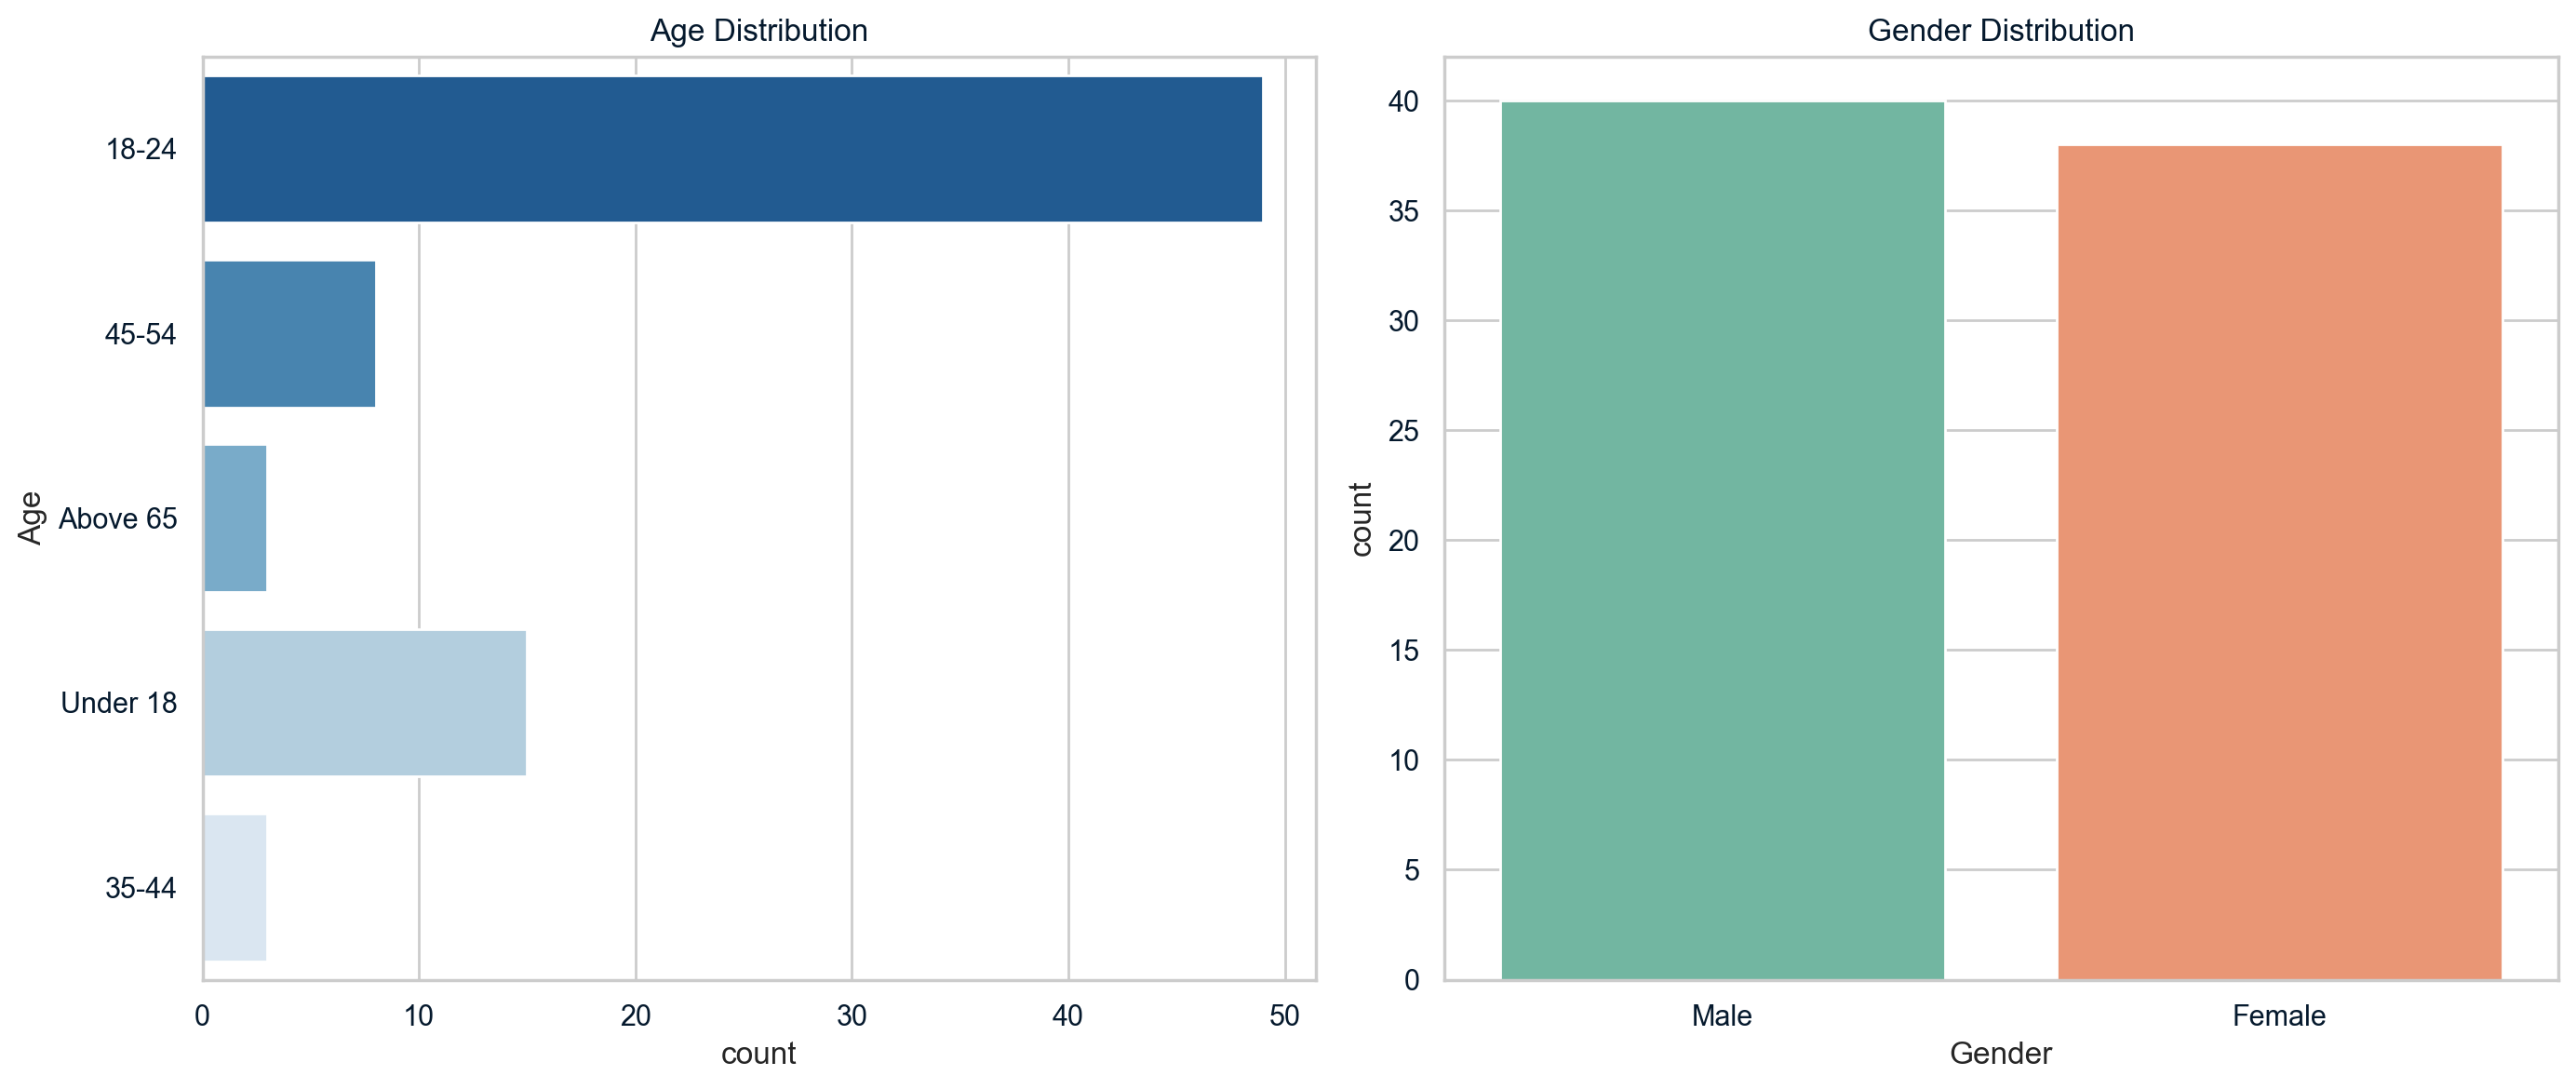

In [ ]:

# Setting visualization styles clearly
sns.set(style='whitegrid')

# Plot demographics clearly (Age and Gender distributions)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age Distribution
sns.countplot(y='Age', data=dietary_habits_df_cleaned, ax=axes[0], palette='Blues_r')
axes[0].set_title('Age Distribution')

# Gender Distribution
sns.countplot(x='Gender', data=dietary_habits_df_cleaned, ax=axes[1], palette='Set2')
axes[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

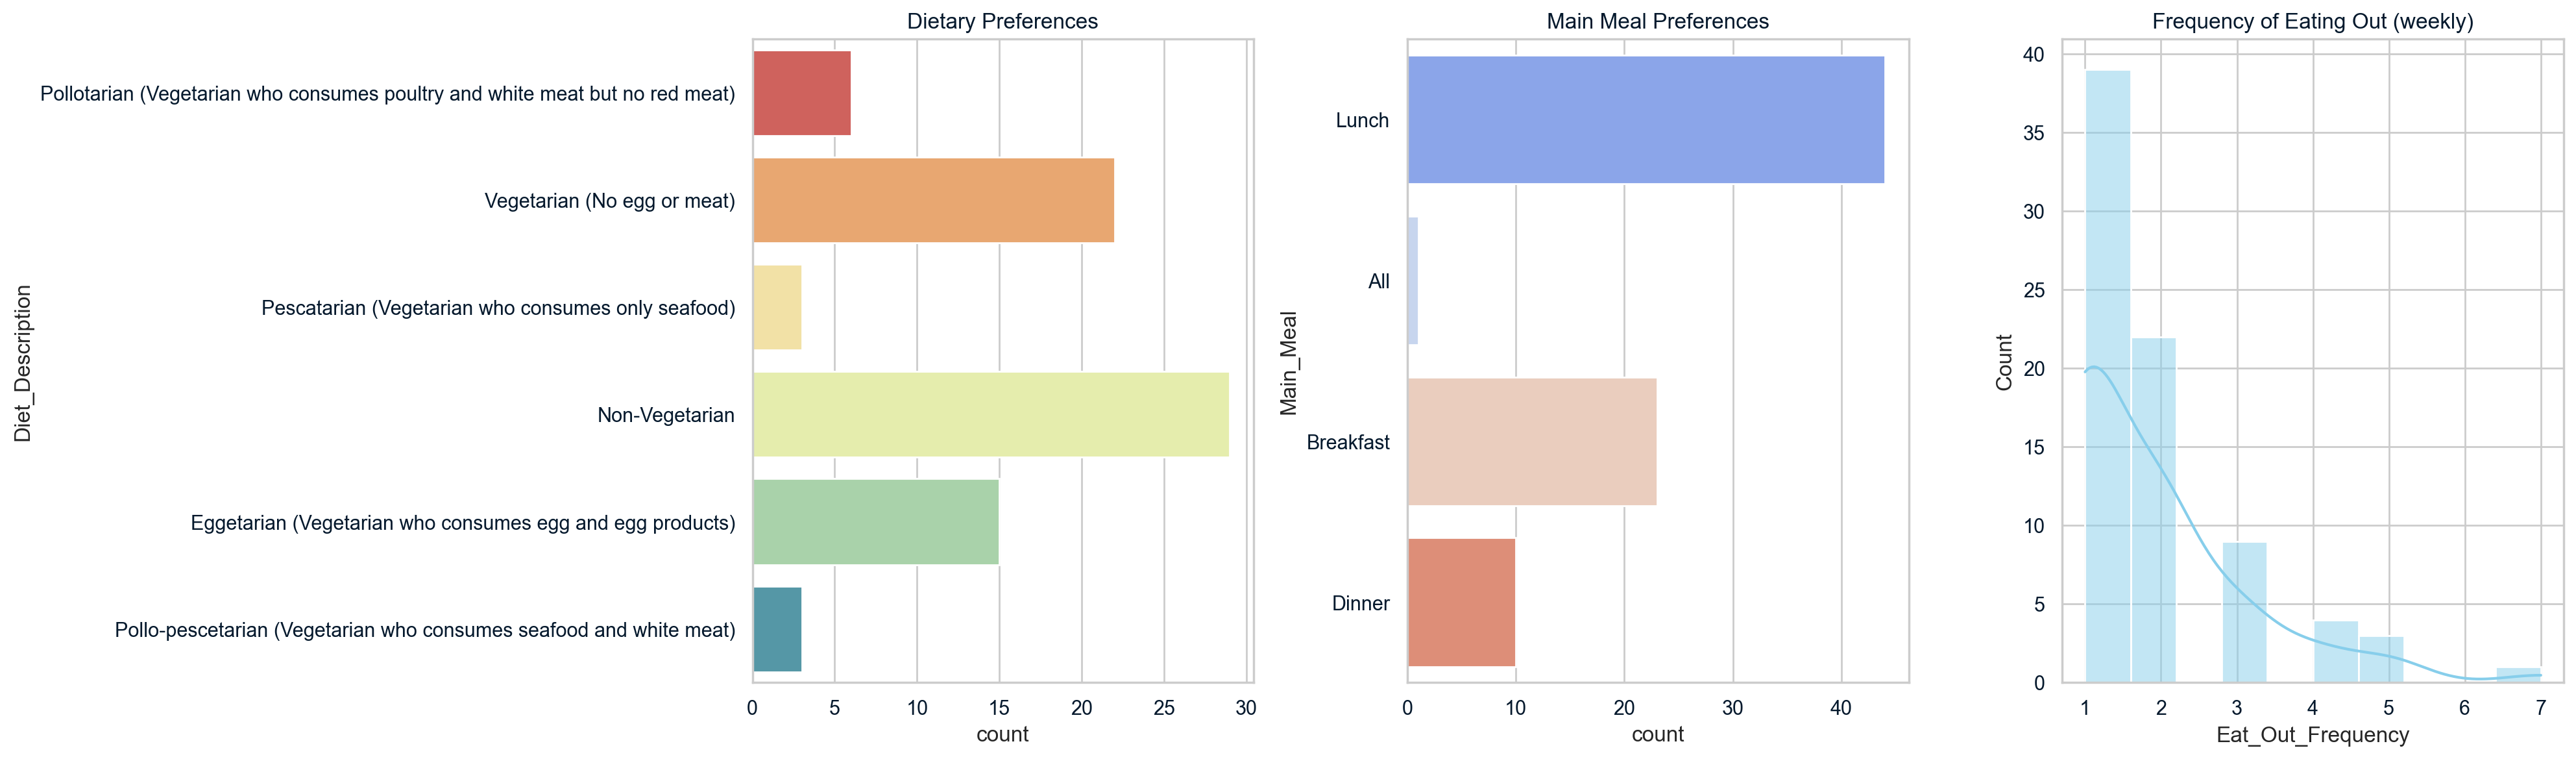

In [ ]:
# Clearly visualize dietary patterns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Dietary Preferences Distribution
sns.countplot(y='Diet_Description', data=dietary_habits_df_cleaned, ax=axes[0], palette='Spectral')
axes[0].set_title('Dietary Preferences')

# Main Meal Preferences Distribution
sns.countplot(y='Main_Meal', data=dietary_habits_df_cleaned, ax=axes[1], palette='coolwarm')
axes[1].set_title('Main Meal Preferences')

# Frequency of Eating Out
sns.histplot(dietary_habits_df_cleaned['Eat_Out_Frequency'], bins=10, kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Frequency of Eating Out (weekly)')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Water Intake Frequency')

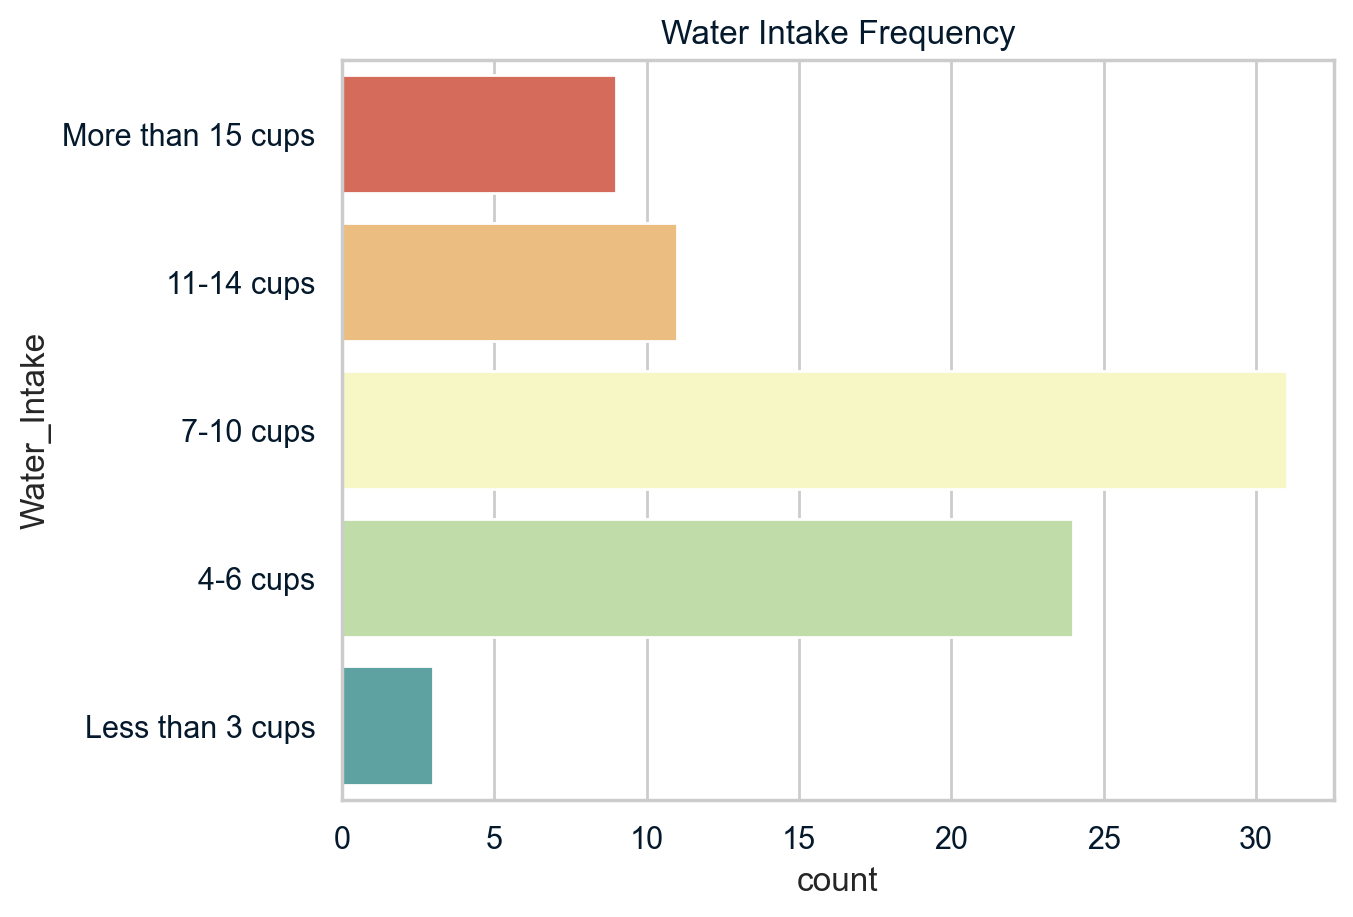

In [ ]:
dietary_habits_df_cleaned.Water_Intake.unique()
#water intake
# fig, axes = plt.subplots(1, 1, figsize=(20, 6))

# Dietary Preferences Distribution
sns.countplot(y='Water_Intake', data=dietary_habits_df_cleaned, palette='Spectral')
plt.title('Water Intake Frequency')

In [ ]:
unhealthy_diet = ['Sweet_Food_Intake',
    'Salty_Food_Intake',
    'Oily_Fried_Food_Intake']
health_diet = [ 'Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake']

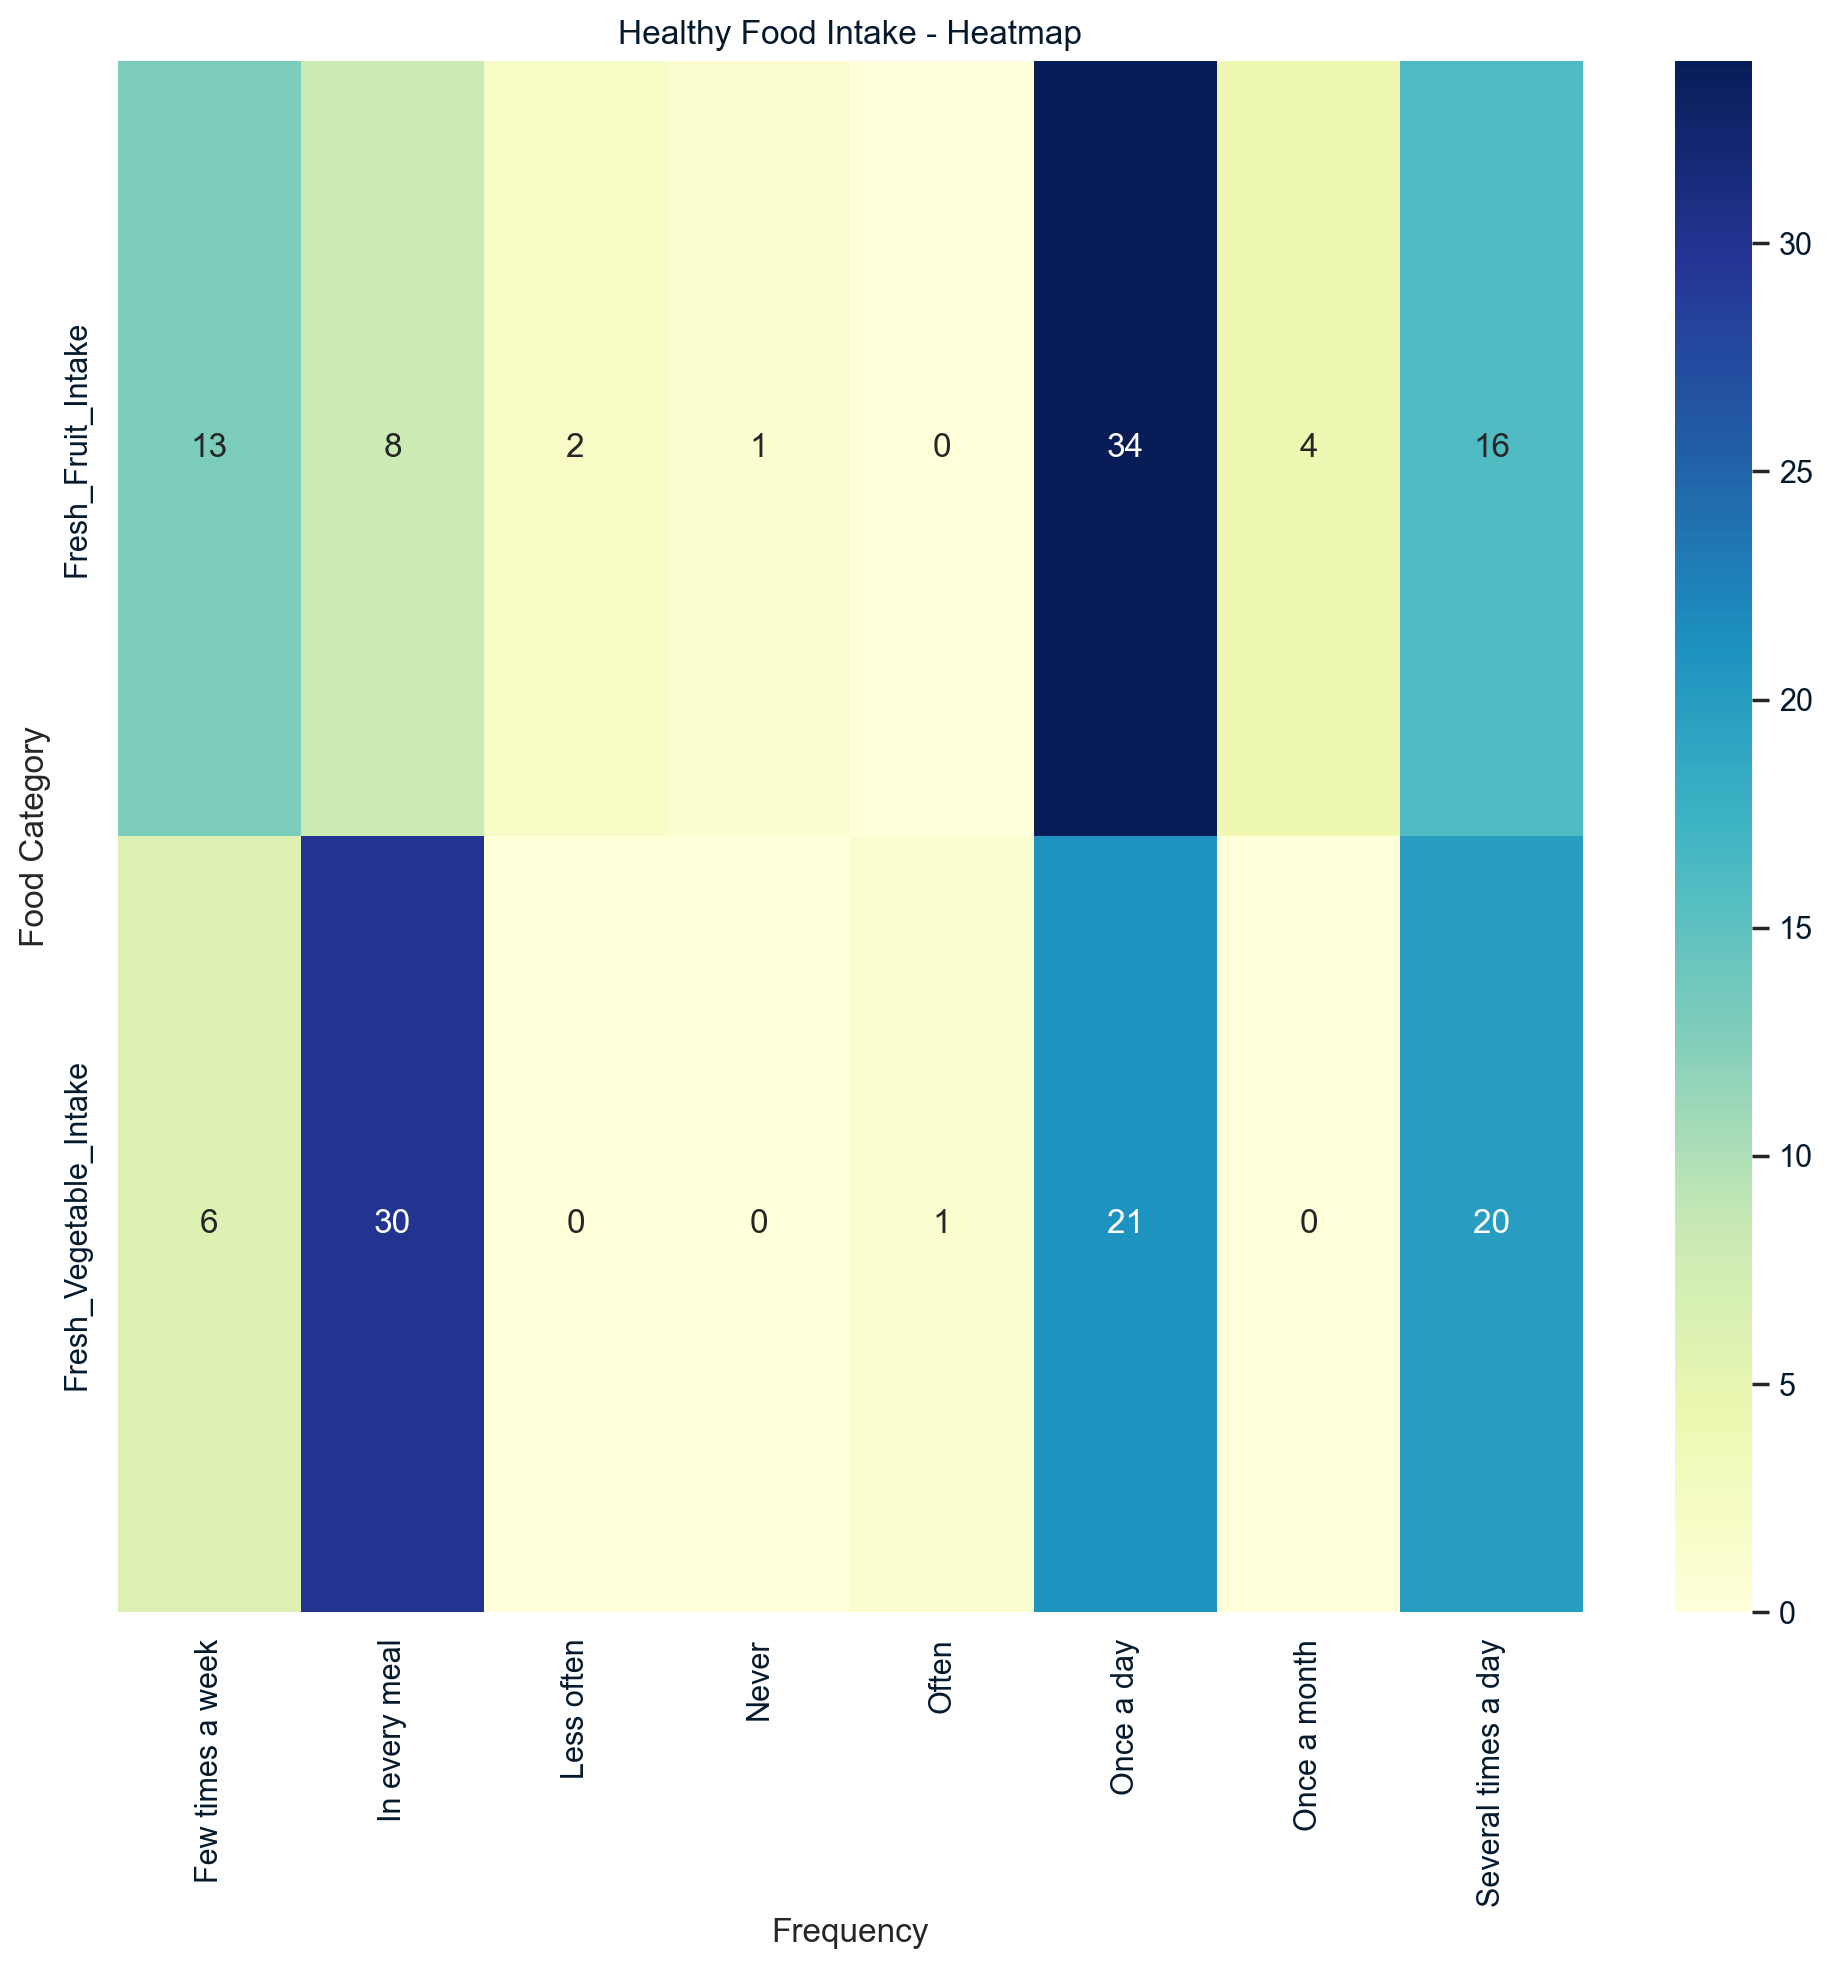

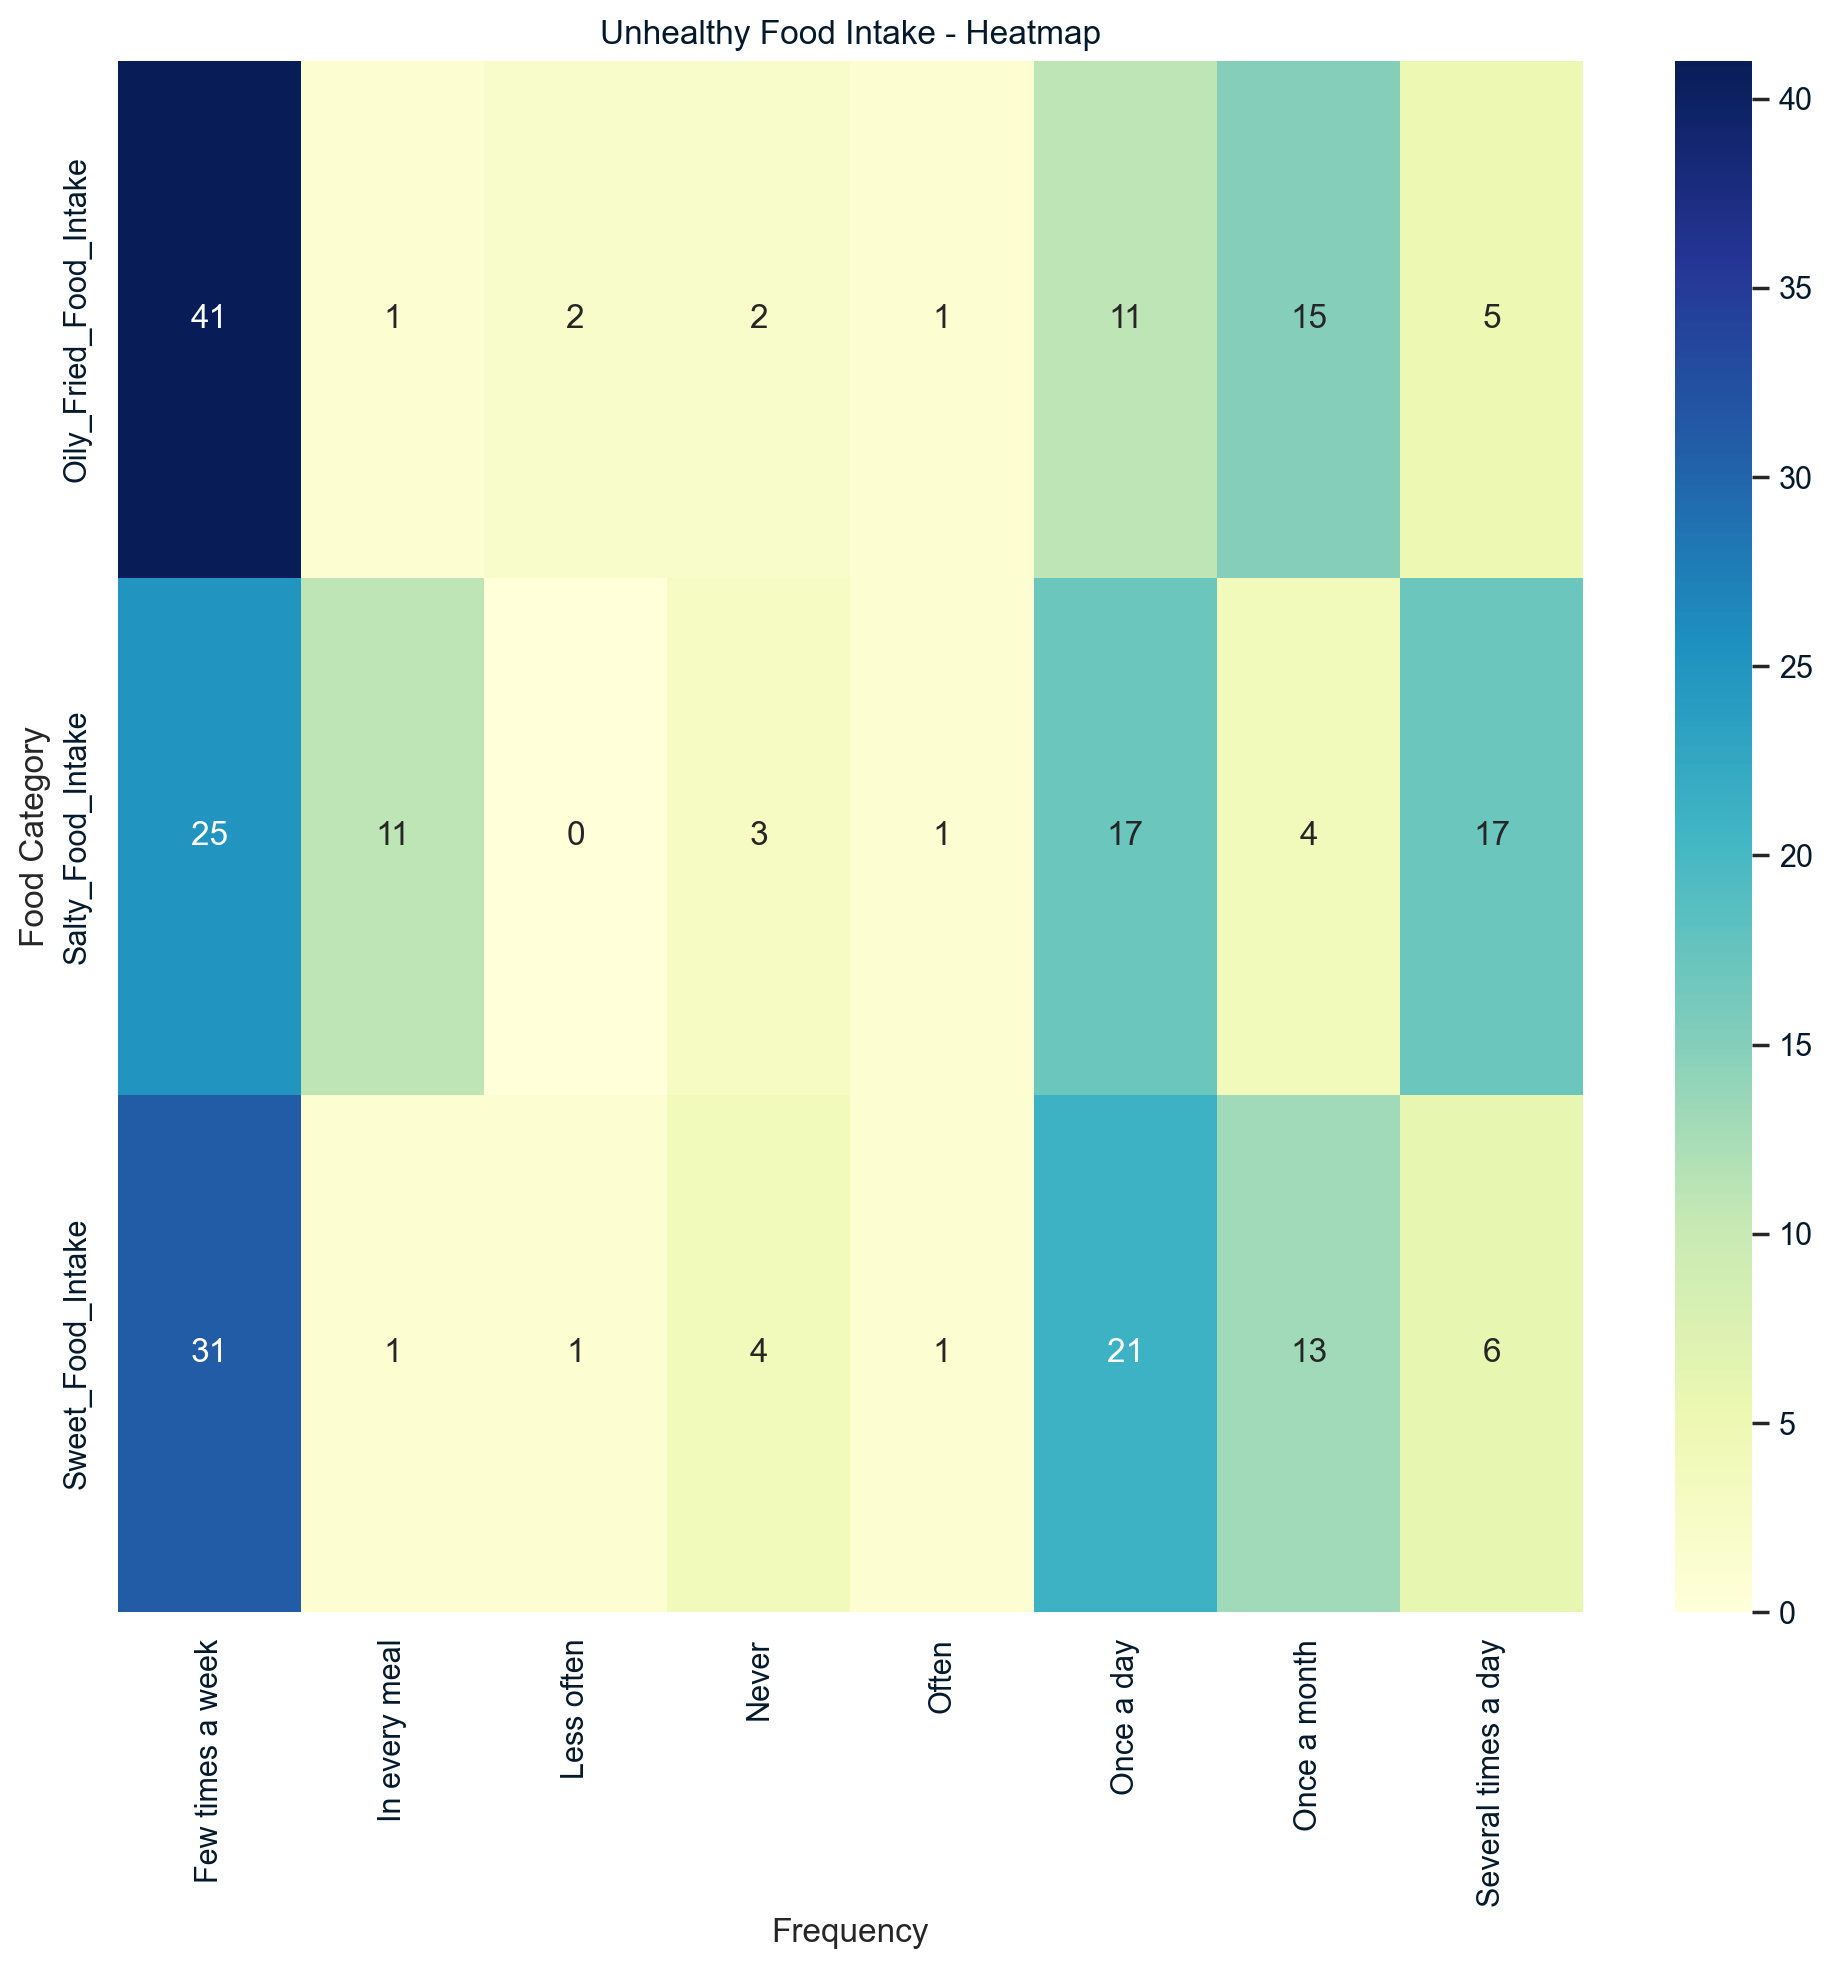

In [ ]:
import seaborn as sns

# Create frequency matrix
def plot_heatmap(cols, title):
    df = dietary_habits_df_cleaned[cols].melt(var_name='Food_Type', value_name='Frequency')
    heatmap_data = pd.crosstab(df['Food_Type'], df['Frequency'])

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(title)
    plt.ylabel('Food Category')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot heatmaps
plot_heatmap(['Fresh_Fruit_Intake', 'Fresh_Vegetable_Intake'], 'Healthy Food Intake - Heatmap')
plot_heatmap(['Sweet_Food_Intake', 'Salty_Food_Intake', 'Oily_Fried_Food_Intake'], 'Unhealthy Food Intake - Heatmap')


In [ ]:
'''Fresh fruits and vegetables are consumed frequently by many respondents — commonly once a day or several times a day.
Oily/fried foods are consumed once a day or few times a week by many respondents — suggesting a higher intake than ideal.

Salty and sweet food intake is also frequent for a notable number of people.
'''

'Fresh fruits and vegetables are consumed frequently by many respondents — commonly once a day or several times a day.\nOily/fried foods are consumed once a day or few times a week by many respondents — suggesting a higher intake than ideal.\n\nSalty and sweet food intake is also frequent for a notable number of people.\n'

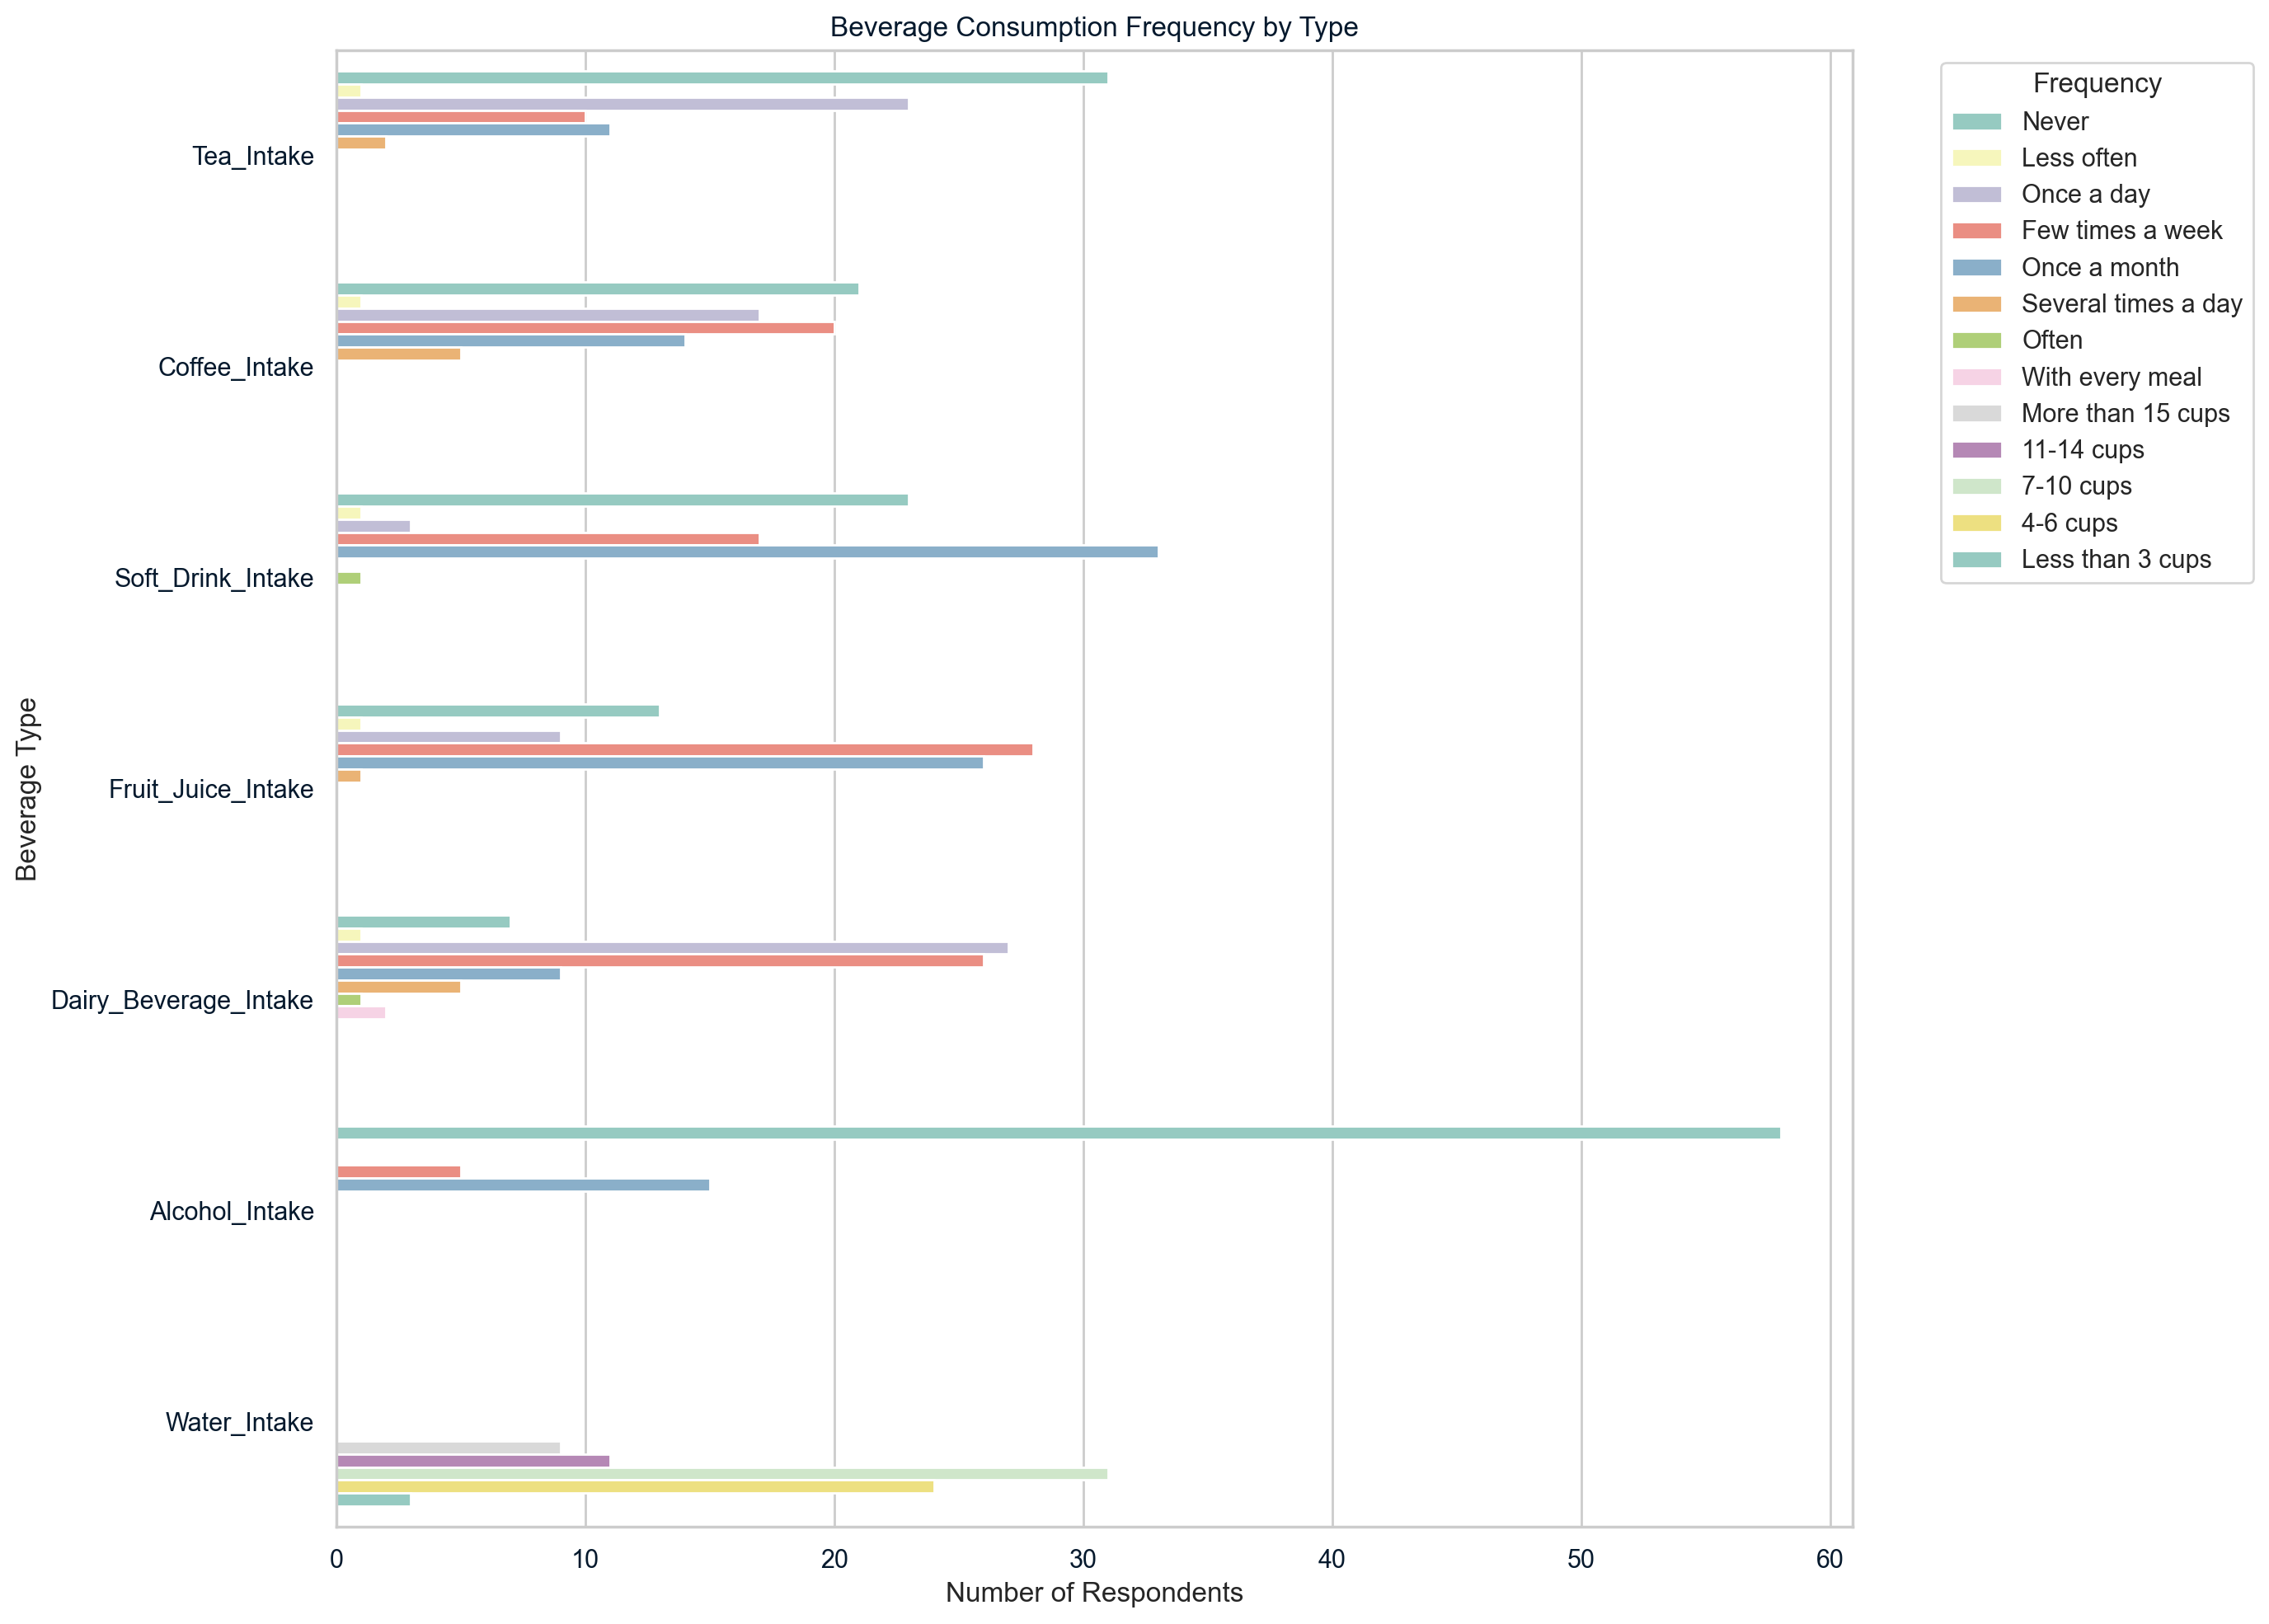

In [ ]:
# Explore beverage consumption patterns

# List of beverage-related columns
beverage_columns = [
    'Tea_Intake', 'Coffee_Intake', 'Soft_Drink_Intake',
    'Fruit_Juice_Intake', 'Dairy_Beverage_Intake', 'Alcohol_Intake', 'Water_Intake'
]

# Melt the data into long format for plotting
beverage_df = dietary_habits_df_cleaned[beverage_columns].melt(var_name='Beverage_Type', value_name='Frequency')

# Create a countplot grouped by frequency for each beverage
plt.figure(figsize=(14, 10))
sns.countplot(data=beverage_df, y='Beverage_Type', hue='Frequency', palette='Set3')
plt.title('Beverage Consumption Frequency by Type')
plt.xlabel('Number of Respondents')
plt.ylabel('Beverage Type')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
'''Tea and Coffee are consumed regularly by a significant portion, with many having them once a day or a few times a week.

Soft drinks and fruit juices are consumed less often or once a month by most respondents, which is healthier behavior.

Alcohol has very low frequency overall—mostly never or once a month.

Dairy beverages (milk, smoothies, etc.) are relatively popular, often consumed once a day or a few times a week.

'''

'Tea and Coffee are consumed regularly by a significant portion, with many having them once a day or a few times a week.\n\nSoft drinks and fruit juices are consumed less often or once a month by most respondents, which is healthier behavior.\n\nAlcohol has very low frequency overall—mostly never or once a month.\n\nDairy beverages (milk, smoothies, etc.) are relatively popular, often consumed once a day or a few times a week.\n\n'

In [ ]:
dietary_habits_df_cleaned['Tea_Intake'].unique()

array(['Never', 'Less often', 'Once a day', 'Few times a week',
       'Once a month', 'Several times a day'], dtype=object)

In [ ]:
dietary_habits_df_cleaned['Dairy_Beverage_Intake'].unique()

array(['Less often', 'Often', 'Once a day', 'Few times a week',
       'Several times a day', 'Never', 'With every meal', 'Once a month'],
      dtype=object)

In [ ]:
dietary_habits_df_cleaned['Fruit_Juice_Intake'].unique()

array(['Never', 'Once a day', 'Less often', 'Once a month',
       'Few times a week', 'Several times a day'], dtype=object)

In [ ]:
beverage_columns = [
    'Tea_Intake', 'Coffee_Intake', 'Soft_Drink_Intake',
    'Fruit_Juice_Intake', 'Dairy_Beverage_Intake', 'Alcohol_Intake', 'Water_Intake'
]

In [ ]:

dietary_habits_df_cleaned['Soft_Drink_Intake'].unique()

array(['Less often', 'Often', 'Never', 'Once a month', 'Few times a week',
       'Once a day'], dtype=object)

In [ ]:
dietary_habits_df_cleaned['Alcohol_Intake'].unique()

array(['Never', 'Once a month', 'Few times a week'], dtype=object)

In [ ]:
dietary_habits_df_cleaned['Coffee_Intake'].unique()

array(['Never', 'Less often', 'Once a day', 'Once a month',
       'Several times a day', 'Few times a week'], dtype=object)

In [ ]:
 'Never','Less often', 'Often', 'Once a month', 'Few times a week',
       'Once a day', 'With every meal', 'Several times a day',

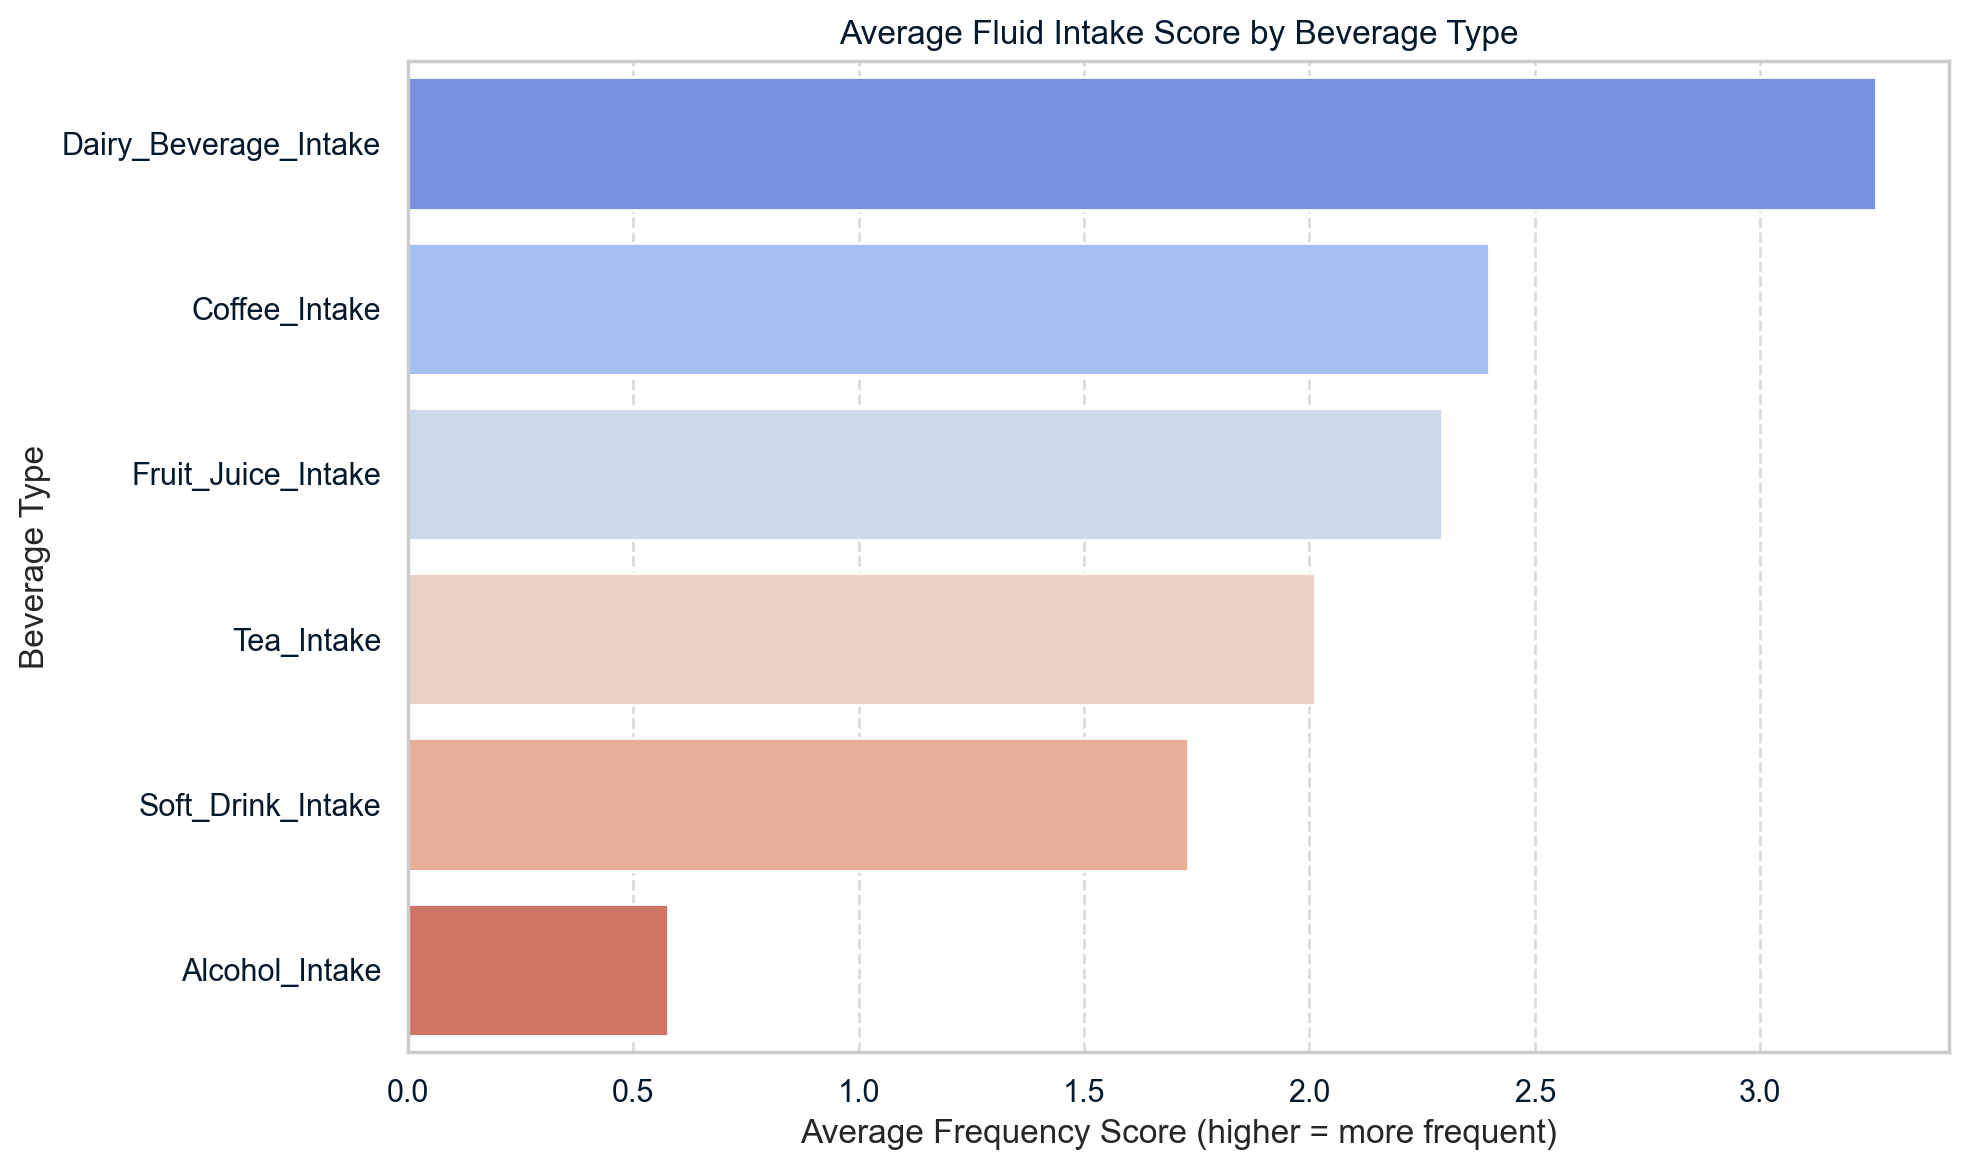

In [ ]:
# Frequency mapping
frequency_order = [
    'Never', 'Less often', 'Once a month', 'Few times a week',
    'Once a day', 'Often', 'Several times a day', 'With every meal'
]
frequency_score_map = {label: i for i, label in enumerate(frequency_order)}

# Convert beverage frequencies to scores
beverage_scores = dietary_habits_df_cleaned[
    ['Tea_Intake', 'Coffee_Intake', 'Soft_Drink_Intake',
     'Fruit_Juice_Intake', 'Dairy_Beverage_Intake', 'Alcohol_Intake']
].applymap(lambda x: frequency_score_map.get(x, 0))

# Calculate mean score for each beverage
beverage_means = beverage_scores.mean().sort_values(ascending=False)

# Plot comparison bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=beverage_means.values, y=beverage_means.index, palette='coolwarm')
plt.title('Average Fluid Intake Score by Beverage Type')
plt.xlabel('Average Frequency Score (higher = more frequent)')
plt.ylabel('Beverage Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
'''Dairy Beverages (milk, smoothies, etc.) are consumed most frequently on average.

Tea and Coffee follow closely, indicating regular daily or near-daily consumption.

Fruit Juices are consumed moderately.

Soft Drinks and Alcohol have the lowest average intake scores, suggesting occasional or rare consumption, which aligns with healthier habits.'''

'Dairy Beverages (milk, smoothies, etc.) are consumed most frequently on average.\n\nTea and Coffee follow closely, indicating regular daily or near-daily consumption.\n\nFruit Juices are consumed moderately.\n\nSoft Drinks and Alcohol have the lowest average intake scores, suggesting occasional or rare consumption, which aligns with healthier habits.'

## Relation Between Diet and fluids

In [ ]:
# food_prices1 = pd.read_csv('data/Food_Prices_Dimension_Table.csv')

In [ ]:
# food_prices1['Tier 1 group'].unique()

In [ ]:
# food_prices1['Tier 2 group'].unique()

In [ ]:
# len(food_prices1.EFPG_code.unique())

In [ ]:
# duplicate_values = food_prices1[food_prices1.EFPG_code.duplicated()]


In [ ]:
# food_prices1 = food_prices1.drop(food_prices1[(food_prices1['EFPG_code'] == 54550) & (food_prices1['EFPG_name'] == 'Bacon, sausage, and lunch meats')].index)

In [ ]:
# food_prices_full = food_prices.merge(food_prices1, on = 'EFPG_code', how = 'left')

In [ ]:
# food_prices_full[food_prices_full['EFPG_code'] ==  54550].shape